### Develop a program to demonstrate the working of the decision tree algorithm. Use Breast Cancer Data set for building the decision tree and apply this knowledge to classify a new sample.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd

In [2]:
# data = load_breast_cancer()
# X = data.data
# y = data.target

data = pd.read_csv("./datasets/wisconsin_breast_cancer.csv")

X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0}) 

X.shape,y.shape

((569, 30), (569,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 94.74%


In [ ]:
new_sample = np.array([X_test.iloc[0]]) #  
prediction = clf.predict(new_sample)

prediction_class = "Benign" if prediction == 1 else "Malignant"
print(f"Predicted Class for the new sample: {prediction_class}")

Predicted Class for the new sample: Malignant


/home/vijeth/ml-lab/.venv/lib64/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


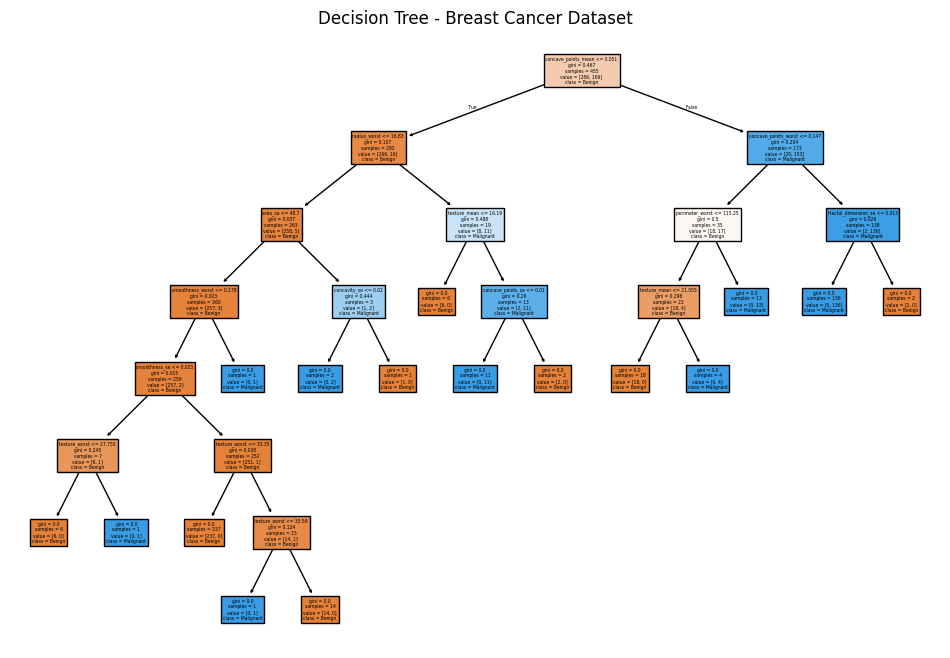

In [ ]:
# Manually specify the features
feature_names = X.columns.tolist()
target_names = ['Benign', 'Malignant']

plt.figure(figsize=(12,8))
tree.plot_tree(clf,filled=True,feature_names=feature_names,
 class_names=target_names)
plt.title("Decision Tree - Breast Cancer Dataset")
plt.show()